In [1]:
# 1. Call libraries

import numpy as np
import pandas as pd
import os

# 2. Call sklearn libraries

# 3. Split data into train and test data
from sklearn.model_selection import train_test_split

# 4. PReprocessong:
#mu-sigma by sd.   standardize
from sklearn.preprocessing import StandardScaler

# 5. Import class DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier as dtree

# 6. To draw decision tree
from sklearn.tree import export_graphviz


# 7. 
# Install as:
#   conda install -c conda-forge python-graphviz 
#   conda install -c anaconda pydot
import graphviz

# 8. 
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [2]:
# Display multiple commands output from a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [5]:
df=pd.read_csv("german_credit_data1.csv")

In [6]:
df.describe()

,Unnamed: 0,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,35.546000,1.904000,3271.258000,20.903000
std,288.819436,11.375469,0.653614,2822.736876,12.058814
min,0.000000,19.000000,0.000000,250.000000,4.000000
25%,249.750000,27.000000,2.000000,1365.500000,12.000000
50%,499.500000,33.000000,2.000000,2319.500000,18.000000
75%,749.250000,42.000000,2.000000,3972.250000,24.000000
max,999.000000,75.000000,3.000000,18424.000000,72.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


In [8]:
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [9]:
df.tail()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
995,995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good
996,996,40,male,3,own,little,little,3857,30,car,good
997,997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,998,23,male,2,free,little,little,1845,45,radio/TV,bad
999,999,27,male,2,own,moderate,moderate,4576,45,car,good


In [10]:
df

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...,...
995,995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good
996,996,40,male,3,own,little,little,3857,30,car,good
997,997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,998,23,male,2,free,little,little,1845,45,radio/TV,bad


In [11]:
df.isnull().sum()


Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [12]:
df=df.drop('Unnamed: 0', axis=1)

In [13]:
type(df)

pandas.core.frame.DataFrame

In [14]:
df

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good
996,40,male,3,own,little,little,3857,30,car,good
997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,23,male,2,free,little,little,1845,45,radio/TV,bad


In [15]:
df.isnull().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [16]:
df=df.dropna()

In [17]:
df.size

5220

In [18]:
df

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad
7,35,male,3,rent,little,moderate,6948,36,car,good
9,28,male,3,own,little,moderate,5234,30,car,bad
...,...,...,...,...,...,...,...,...,...,...
989,48,male,1,own,little,moderate,1743,24,radio/TV,good
993,30,male,3,own,little,little,3959,36,furniture/equipment,good
996,40,male,3,own,little,little,3857,30,car,good
998,23,male,2,free,little,little,1845,45,radio/TV,bad


In [19]:
df.Purpose.unique()

array(['radio/TV', 'furniture/equipment', 'car', 'business',
       'domestic appliances', 'repairs', 'vacation/others', 'education'],
      dtype=object)

In [20]:
df=pd.get_dummies(df, columns=['Sex','Housing','Saving accounts','Checking account','Purpose','Risk'])

In [21]:
X=df[list(df)[1:9]]

In [22]:
df

,Age,Job,Credit amount,Duration,Sex_female,Sex_male,Housing_free,Housing_own,Housing_rent,Saving accounts_little,...,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others,Risk_bad,Risk_good
1,22,2,5951,48,1,0,0,1,0,1,...,0,0,0,0,0,1,0,0,1,0
3,45,2,7882,42,0,1,1,0,0,1,...,0,0,0,0,1,0,0,0,0,1
4,53,2,4870,24,0,1,1,0,0,1,...,0,1,0,0,0,0,0,0,1,0
7,35,3,6948,36,0,1,0,0,1,1,...,0,1,0,0,0,0,0,0,0,1
9,28,3,5234,30,0,1,0,1,0,1,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
989,48,1,1743,24,0,1,0,1,0,1,...,0,0,0,0,0,1,0,0,0,1
993,30,3,3959,36,0,1,0,1,0,1,...,0,0,0,0,1,0,0,0,0,1
996,40,3,3857,30,0,1,0,1,0,1,...,0,1,0,0,0,0,0,0,0,1
998,23,2,1845,45,0,1,1,0,0,1,...,0,0,0,0,0,1,0,0,1,0


In [23]:
y=df['Risk_good']

In [24]:
# 2.4 Standardize data:
#     Even though, for a decision tree,
#     data standardization is not needed,
#     but make it a habit to do so:

# 2.4.1 Instantiate object
ss = StandardScaler()

# 2.4.2 Train object on data
ss.fit(X)

# 2.4.3 Trandform data
X = ss.transform(X)

StandardScaler()

In [25]:
# 2.5 Split X and y into train and test data:

X_train, X_test, y_train, y_test = train_test_split(
                                                     X,
                                                     y,
                                                     test_size = 0.3,
                                                     shuffle = True,
                                                     stratify = y
                                                    )

# 2.5.1 About train data:
                                   
X_train.shape  # (105,4)
print()

# 2.5.2 Test data:

X_test.shape   # (45,4)
print()

(365, 8)

(157, 8)

In [26]:
# 3. Start modeling
# 3.1 Initialize our decision tree object.
#     Supply relevant parameters

ct = dtree(
           criterion="gini",    # Alternative 'entropy'
           max_depth=None       # Alternative, specify an integer
                              # 'None' means full tree till single leaf
           )

In [27]:
# 3.2 Train our decision tree:

ct.fit(X_train,y_train)

DecisionTreeClassifier()

In [28]:
# 4.0 Make predictions of test data
y_te = ct.predict(X_test)

In [29]:
# 4.1 Get accuracy:

np.sum((y_test == y_te))/y_test.size  # 0.93

0.5605095541401274

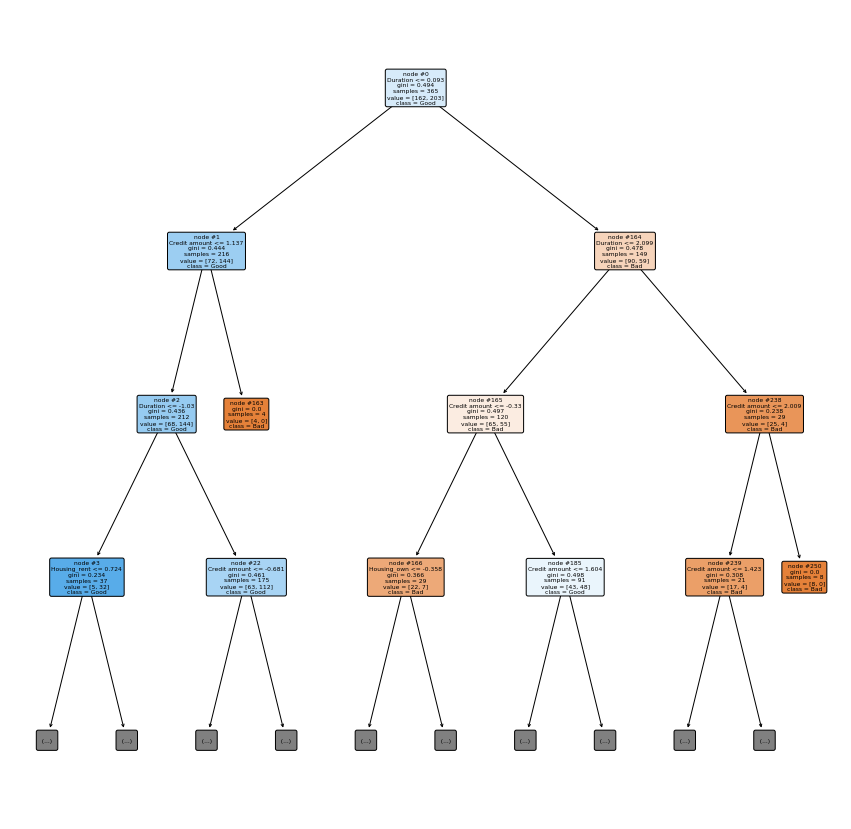

In [30]:
# 4.2 Plot decision tree
# Refer: https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html#sklearn.tree.plot_tree
_=plt.figure(figsize=(15,15))
_=plot_tree(
            ct,
            max_depth = 3,  # Draw upto depth of 3
            rounded = True, # Rounded boxes
            filled = True,  # Boxes filled with color
            impurity = True,# Show impurity level
            node_ids = True,# Display node_id
            feature_names = list(df)[1:9],
            class_names = ["Bad","Good"]
            )

_=plt.show()

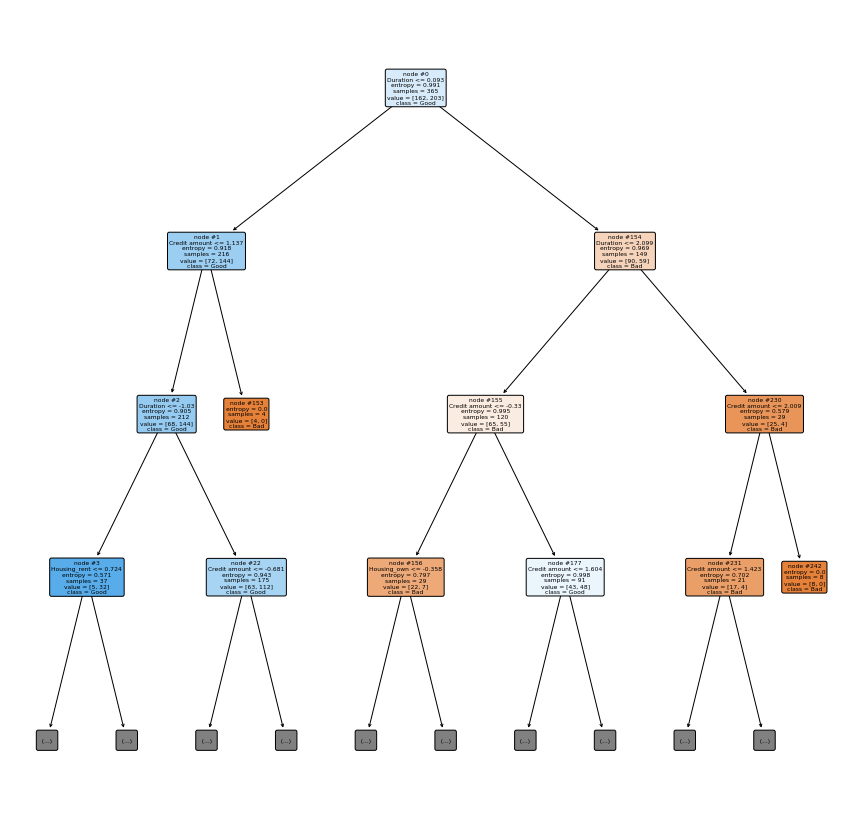

In [31]:
# 5.0 Plot decision tree with 'entropy' as criterion:

ct = dtree(
           criterion="entropy",    # Alternative 'entropy'
           max_depth=None       # Alternative, specify an integer
                              # 'None' means full tree till single leaf
           )
# 5.1
_=ct.fit(X_train,y_train)

# 5.2
_=plt.figure(figsize=(15,15))
_=plot_tree(
            ct,
            max_depth = 3,  # Draw upto depth of 3
            rounded = True, # Rounded boxes
            filled = True,  # Boxes filled with color
            impurity = True,# Show impurity level
            node_ids = True,# Display node_id
            feature_names = list(df)[1:9],
            class_names = ["Bad","Good"]
            )

_=plt.show()

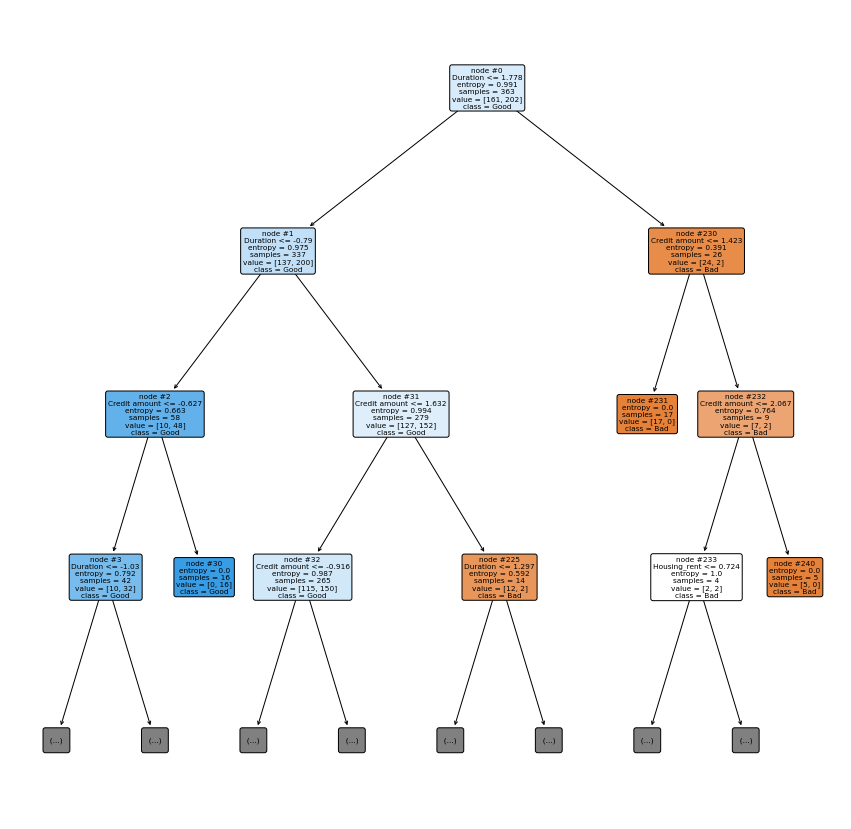

In [32]:
# 5.3 Remove just two rows and decision tree changes:


X_train, X_test, y_train, y_test = train_test_split(
                                                     X,
                                                     y,
                                                     test_size = 0.3,
                                                     shuffle = True,
                                                     stratify = y
                                                    )

ct1 = dtree(
           criterion="entropy",    # Alternative 'entropy'
           max_depth=None       # Alternative, specify an integer
                              # 'None' means full tree till single leaf
           )
##
_=ct1.fit(X_train[2:,:],y_train[2:])

##
_=plt.figure(figsize=(15,15))
_=plot_tree(
            ct1,
            max_depth = 3,  # Draw upto depth of 3
            rounded = True, # Rounded boxes
            filled = True,  # Boxes filled with color
            impurity = True,# Show impurity level
            node_ids = True,# Display node_id
            feature_names = list(df)[1:9],
            class_names = ["Bad","Good"]
            )

_=plt.show()

In [33]:
# 5.4 Make predictions of test data
y_te = ct.predict(X_test)
np.sum((y_test == y_te))/y_test.size  # 0.93

0.8471337579617835